# Intraday
An analysis of intraday volatility in select stable coins.

## Selected stablecoins
* DAI
* PAX
* UST


In [1]:
import pandas as pd
from time_utils import epoch_to_datetime
from pathlib import Path


## Data Preparation

Data for these datasets was obtained from Kaggle.
Inspection of these data sets revealed the following:

* the 3 stable coin files have the same format
* time is represented using Unix Epochtime in milliseconds

### File Format
The data is CSV and the schema is:
```
    time, open, close, high, low, volume
    where:
       * time is Unix epoch time in milliseconds
       * open is float
       * close is float
       * high is float
       * low is float
```

to facilitate understanding and analysis, a human readable time will be added to the dataframe

In [2]:
def prep_kaggle_coin_dataframe(coin_df):
    """Performs the repeatable prep and normalization activities on the coin data frame provided as input
    The format is expected to be:
    time, open, close, high, low, volume
    where:
       * time is Unix epoch time in milliseconds
       * open is float
       * close is float
       * high is float
       * low is float
    
    Parameters:
        coin_df (DataFrame): the coin dataframe to prepare and normalize
       
    Returns:
        DataFrame: the cleaned and normalized dataframe
    """
    # To be consistent with Pandas behavior, clone the dataframe and leave the original unaltered
    result_df = coin_df.copy()
    
    # scale Unix epoc time milli to normal Unix epoch time, which is in seconds
    result_df['time'] = result_df['time']/1000
    
    # add a human readable time column
    result_df['timestamp'] =  result_df['time'].apply(epoch_to_datetime)
    
    # set the unix epoch time column as the index
    result_df.set_index('timestamp',inplace=True)
    
    # sort data frame
    result_df.sort_index(inplace=True)
    
    
    #return the prepped and normalized dataframe
    return result_df

In [3]:
# read DAI csv file into a dataframe
dai_minute_df = pd.read_csv(
    Path('Resources/daiusd.csv')
)

# prep dataframe
dai_minute_df = prep_kaggle_coin_dataframe(dai_minute_df)

# inspect dataframe
display(dai_minute_df.head())
display(dai_minute_df.tail())


,time,open,close,high,low,volume
timestamp,,,,,,
2018-04-18 12:19:00-04:00,1.524068e+09,0.99989,0.99989,0.99989,0.99989,1023.773958
2018-04-18 12:23:00-04:00,1.524069e+09,0.99910,0.99910,0.99910,0.99910,50.000000
2018-04-18 12:43:00-04:00,1.524070e+09,0.99989,0.99989,0.99989,0.99989,625.572847
2018-04-18 12:52:00-04:00,1.524070e+09,0.99900,0.99900,0.99900,0.99900,242.865296
2018-04-18 12:58:00-04:00,1.524071e+09,0.99900,0.99900,0.99900,0.99900,36.699715


,time,open,close,high,low,volume
timestamp,,,,,,
2022-05-07 05:54:00-04:00,1.651917e+09,1.0006,1.0006,1.0006,1.0006,2.488245
2022-05-07 05:57:00-04:00,1.651917e+09,1.0009,1.0009,1.0009,1.0009,3.691632
2022-05-07 05:58:00-04:00,1.651917e+09,1.0006,1.0005,1.0006,1.0005,14.000000
2022-05-07 06:01:00-04:00,1.651918e+09,1.0009,1.0009,1.0009,1.0009,2.690779
2022-05-07 06:02:00-04:00,1.651918e+09,1.0006,1.0006,1.0006,1.0006,3.901711


In [4]:
# read PAX csv file into a dataframe
pax_minute_df = pd.read_csv(
    Path('Resources/paxusd.csv')
)

# prep dataframe
pax_minute_df = prep_kaggle_coin_dataframe(pax_minute_df)


# inspect dataframe
display(pax_minute_df.head())
display(pax_minute_df.tail())


,time,open,close,high,low,volume
timestamp,,,,,,
2018-12-19 15:25:00-05:00,1.545251e+09,1.0343,1.0343,1.0343,1.0343,95.226894
2018-12-19 15:46:00-05:00,1.545252e+09,1.0343,1.0343,1.0343,1.0343,684.815500
2018-12-19 17:02:00-05:00,1.545257e+09,1.0343,1.0348,1.0348,1.0343,502.601606
2018-12-19 17:04:00-05:00,1.545257e+09,1.0348,1.0350,1.0350,1.0348,10555.053276
2018-12-19 17:06:00-05:00,1.545257e+09,1.0350,1.0350,1.0350,1.0350,394.379800


,time,open,close,high,low,volume
timestamp,,,,,,
2022-05-06 08:34:00-04:00,1.651840e+09,1.0008,1.0008,1.0008,1.0008,77.841399
2022-05-06 19:31:00-04:00,1.651880e+09,1.0009,1.0009,1.0009,1.0009,77.685716
2022-05-07 01:58:00-04:00,1.651903e+09,1.0010,1.0010,1.0010,1.0010,77.522600
2022-05-07 05:05:00-04:00,1.651914e+09,1.0009,1.0009,1.0009,1.0009,77.367554
2022-05-07 05:50:00-04:00,1.651917e+09,1.0010,1.0010,1.0010,1.0010,77.205106


In [5]:
# read UST csv file into a dataframe
ust_minute_df = pd.read_csv(
    Path('Resources/ustusd.csv')
)

# prep dataframe
ust_minute_df = prep_kaggle_coin_dataframe(ust_minute_df)


# inspect dataframe
display(ust_minute_df.head())
display(ust_minute_df.tail())


,time,open,close,high,low,volume
timestamp,,,,,,
2018-12-16 04:02:00-05:00,1.544951e+09,1.0249,1.0250,1.0250,1.0249,2194.161027
2018-12-16 04:07:00-05:00,1.544951e+09,1.0250,1.0250,1.0250,1.0250,39.853420
2018-12-16 04:08:00-05:00,1.544951e+09,1.0250,1.0250,1.0250,1.0250,113.510104
2018-12-16 04:09:00-05:00,1.544951e+09,1.0250,1.0250,1.0250,1.0250,11846.709951
2018-12-16 04:16:00-05:00,1.544952e+09,1.0245,1.0245,1.0245,1.0245,113.903120


,time,open,close,high,low,volume
timestamp,,,,,,
2022-05-07 06:22:00-04:00,1.651919e+09,1.0004,1.0004,1.0004,1.0004,23909.828140
2022-05-07 06:23:00-04:00,1.651919e+09,1.0004,1.0003,1.0004,1.0003,613.792263
2022-05-07 06:24:00-04:00,1.651919e+09,1.0004,1.0003,1.0004,1.0003,10955.342234
2022-05-07 06:25:00-04:00,1.651919e+09,1.0004,1.0004,1.0004,1.0004,10.685386
2022-05-07 06:26:00-04:00,1.651919e+09,1.0004,1.0004,1.0004,1.0004,1469.063846


## Explore 1 recent month of high frequency data

Use March 2022

In [6]:
start = '2022-03-01'
end = '2022-03-31'

In [7]:
# concatenate price data into 1 dataset
dai_minute_march_2022_df = dai_minute_df[start:end]['close']
pax_minute_march_2022_df = pax_minute_df[start:end]['close']
ust_minute_march_2022_df = ust_minute_df[start:end]['close']
coins_df = pd.concat([dai_minute_march_2022_df,pax_minute_march_2022_df,ust_minute_march_2022_df],axis=1)
coins_df.columns=['DAI','PAX','UST']
coins_df.describe()

,DAI,PAX,UST
count,16546.000000,77.000000,41484.000000
mean,1.000113,1.000339,1.000415
std,0.000475,0.000480,0.000277
min,0.996060,0.999680,0.999700
25%,0.999750,1.000000,1.000200
50%,1.000100,1.000100,1.000400
75%,1.000500,1.000700,1.000700
max,1.003100,1.001700,1.001500


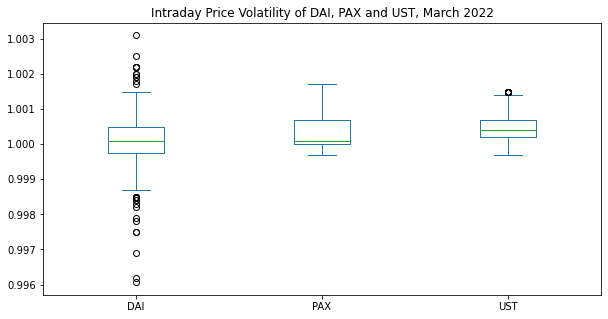

In [8]:
coins_march_2022_box_plot = coins_df.plot(
    kind='box',
    title='Intraday Price Volatility of DAI, PAX and UST, March 2022',
    figsize=(10,5)
)


In [17]:
coins_march_2022_box_plot.figure.savefig('images/coins_intraday_volatility_march_2022.png')

## Explore 1 month of high frequency data from earlier in the dataset

Use Jan 2019

In [19]:
start = '2019-01-01'
end = '2019-01-31'

In [20]:
# concatenate price data into 1 dataset
dai_minute_jan_2019_df = dai_minute_df[start:end]['close']
pax_minute_jan_2019_df = pax_minute_df[start:end]['close']
ust_minute_jan_2019_df = ust_minute_df[start:end]['close']
coins_df = pd.concat([dai_minute_jan_2019_df,pax_minute_jan_2019_df,ust_minute_jan_2019_df],axis=1)
coins_df.columns=['DAI','PAX','UST']
coins_df.describe()

,DAI,PAX,UST
count,778.000000,32674.000000,18117.000000
mean,1.016610,1.021067,1.029209
std,0.009606,0.003760,0.010059
min,0.999000,1.011300,1.012000
25%,1.008400,1.018500,1.019500
50%,1.016150,1.021000,1.030400
75%,1.024500,1.024000,1.037300
max,1.037800,1.040700,1.049500


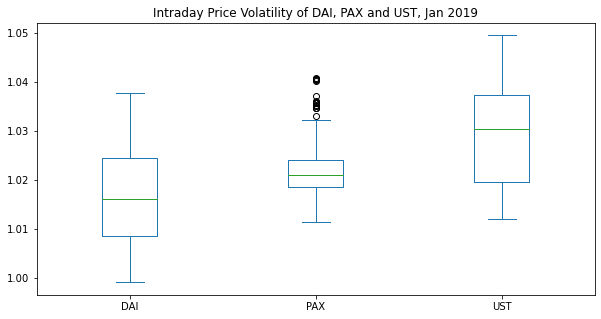

In [21]:
coins_jan_2019_box_plot = coins_df.plot(
    kind='box',
    title='Intraday Price Volatility of DAI, PAX and UST, Jan 2019',
    figsize=(10,5)
)

In [22]:
coins_jan_2019_box_plot.figure.savefig('images/coins_intraday_volatility_jan_2019.png')